In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Import CSV using pandas
nyc_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory = False)

<h1>Data Analysis</h1>

<h3>Identifying dimensions and removing irrelevant data</h3>

In [154]:
# dimensions of the dataset
nyc_df.shape

(300698, 53)

In [155]:
# get dataset info
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [156]:
# Finding null values in dataset
nyc_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [157]:
# Get columns
nyc_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [158]:
# Dropping irrelevant columns based on requirements
nyc_df.drop(['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location'], inplace=True, axis=1)
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


<h3>Finding Elapsed Time for service requests</h3>

In [159]:
# Take only records with tickets that are closed
nyc_df = nyc_df[nyc_df['Status'] == "Closed"]

In [160]:
# Adding new column for complaint elapsed time
nyc_df['Created Date'] = pd.to_datetime(nyc_df['Created Date'])
nyc_df['Closed Date'] = pd.to_datetime(nyc_df['Closed Date'])
nyc_df['Request_Closing_Time'] = nyc_df['Closed Date'] - nyc_df['Created Date']
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298471 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              298471 non-null  int64          
 1   Created Date            298471 non-null  datetime64[ns] 
 2   Closed Date             298471 non-null  datetime64[ns] 
 3   Agency                  298471 non-null  object         
 4   Complaint Type          298471 non-null  object         
 5   Descriptor              292568 non-null  object         
 6   Location Type           298406 non-null  object         
 7   Incident Zip            297964 non-null  float64        
 8   City                    297965 non-null  object         
 9   Status                  298471 non-null  object         
 10  Resolution Description  298471 non-null  object         
 11  Borough                 298471 non-null  object         
 12  Latitude        

In [161]:
# Replacing all null values with "unspecified"
nyc_df.fillna("unspecified", inplace=True)

# Checking unique values again
nyc_df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

<h1>Data Visualisation</h1>

<h3>Complaint Type based on City and it's count</h3>

In [162]:
grouped_df = pd.DataFrame({"Count": nyc_df.groupby(["Complaint Type", "City"]).size()}).reset_index()
grouped_df.sort_values("Count", ascending = False)

,Complaint Type,City,Count
83,Blocked Driveway,BROOKLYN,28139
349,Illegal Parking,BROOKLYN,27454
549,Noise - Street/Sidewalk,NEW YORK,20424
424,Noise - Commercial,NEW YORK,14544
526,Noise - Street/Sidewalk,BROOKLYN,13354
...,...,...,...
205,Disorderly Youth,SAINT ALBANS,1
270,Graffiti,RICHMOND HILL,1
269,Graffiti,REGO PARK,1
268,Graffiti,QUEENS VILLAGE,1


<h3>Complaint Type vs Complaint Count (Bar Graph)</h3>

Text(0, 0.5, 'complaint type')

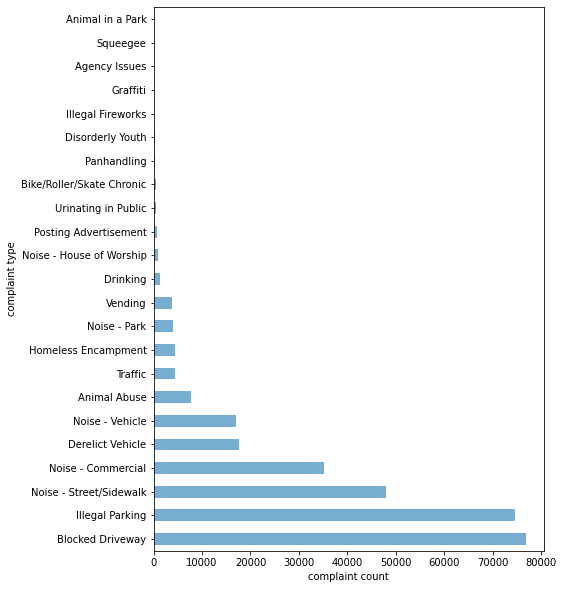

In [163]:
ax1 = nyc_df["Complaint Type"].value_counts().plot(kind = 'barh', alpha = 0.6, figsize = (7, 10))
ax1.set_xlabel("complaint count")
ax1.set_ylabel("complaint type")

As we can see in the above graph, NYPD receives maximum complaints for "Blocked Driveway"

<h3>City vs Complaint Count (Bar Graph)</h3>

Text(0, 0.5, 'city name')

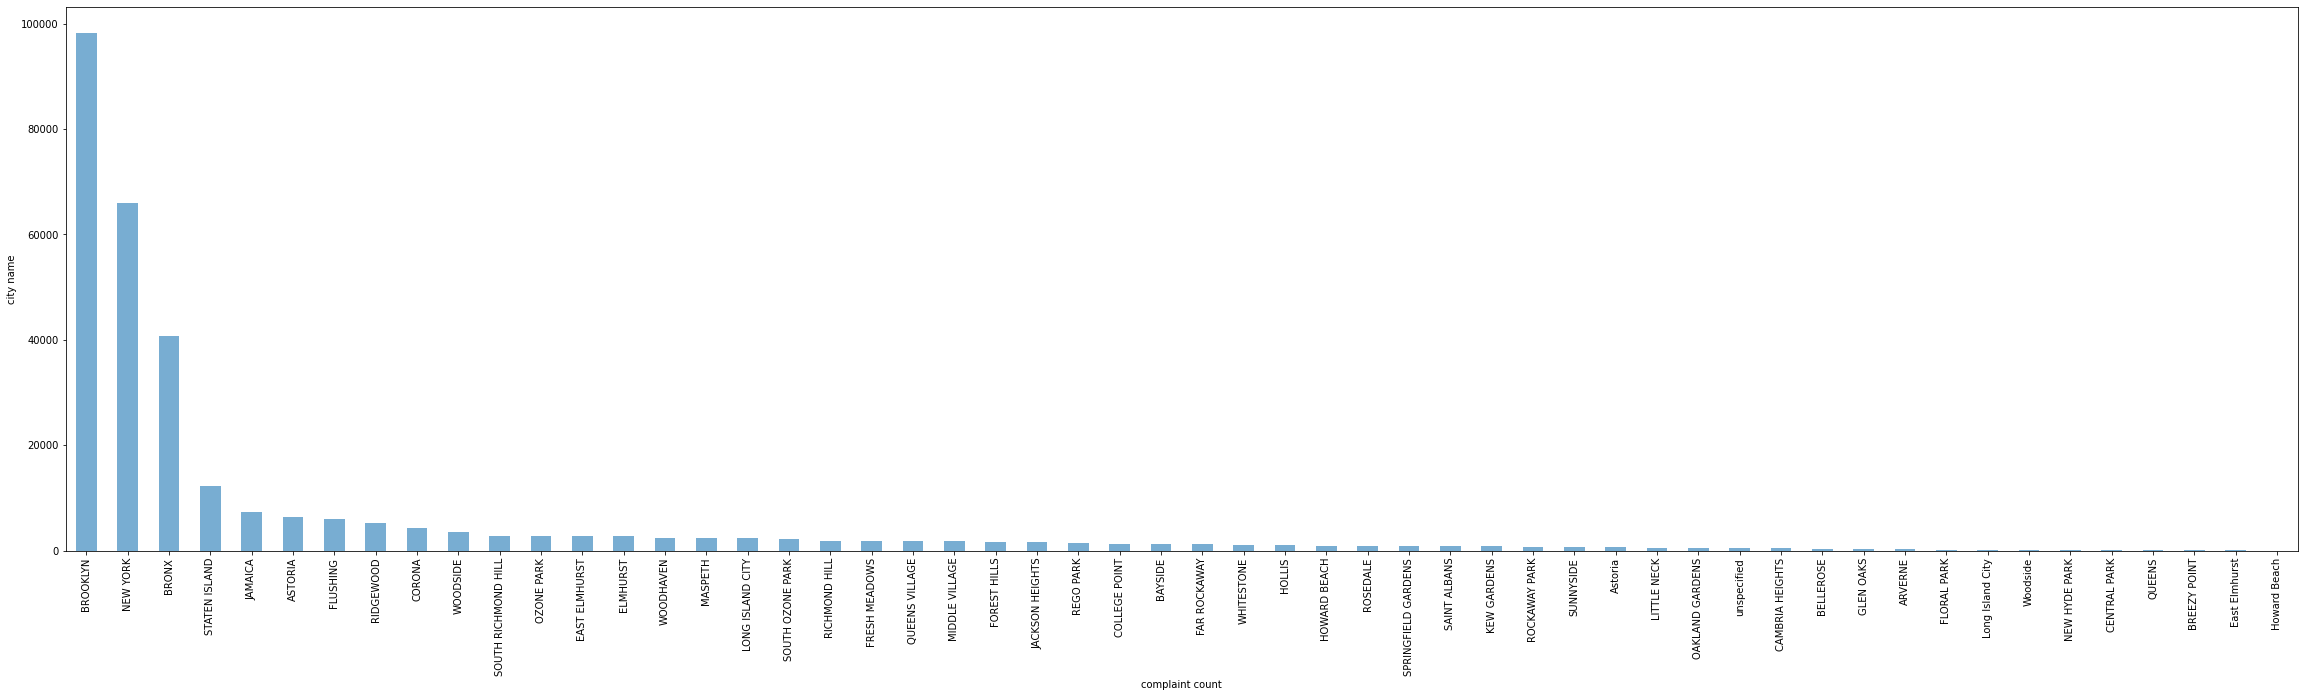

In [164]:
# City with highest number of complaints
ax2 = nyc_df["City"].value_counts().plot(kind = 'bar', alpha = 0.6, figsize = (40, 10))
ax2.set_xlabel("complaint count")
ax2.set_ylabel("city name")

As seen in the bar graph above, the city with the highest number of complaints is "Brooklyn"

In [165]:
# Finding the most common complaints in New York City
complaintTypeByCity = pd.DataFrame({"Complaint Count": nyc_df[nyc_df["City"] == 'BROOKLYN']\
                                    .groupby(["Complaint Type", "City"]).size()}).reset_index()
complaintTypeByCity.sort_values("Complaint Count", ascending = False)

,Complaint Type,City,Complaint Count
2,Blocked Driveway,BROOKLYN,28139
9,Illegal Parking,BROOKLYN,27454
13,Noise - Street/Sidewalk,BROOKLYN,13354
10,Noise - Commercial,BROOKLYN,11458
3,Derelict Vehicle,BROOKLYN,5179
14,Noise - Vehicle,BROOKLYN,5176
0,Animal Abuse,BROOKLYN,2393
12,Noise - Park,BROOKLYN,1554
17,Traffic,BROOKLYN,1085
7,Homeless Encampment,BROOKLYN,855


As seen in the above table, "Blocked Driveway" is the highest reported 311 call by the people of "Brooklyn".

<h3>Data Visualisation of Boroughs</h3>

In [166]:
groupedByBorough = pd.DataFrame({"Complaint Count": nyc_df.groupby("Borough").size()})
groupedByBorough

,Complaint Count
Borough,
BRONX,40690
BROOKLYN,98275
MANHATTAN,66098
QUEENS,80607
STATEN ISLAND,12335
Unspecified,466


<AxesSubplot:ylabel='Borough'>

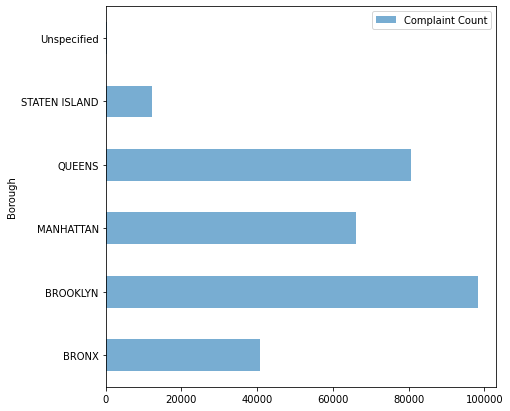

In [167]:
groupedByBorough.plot(kind="barh", alpha=0.6, figsize=(7, 7))

As seen in the above bar graph, "Brooklyn" is the borough with the highest number of complaints.

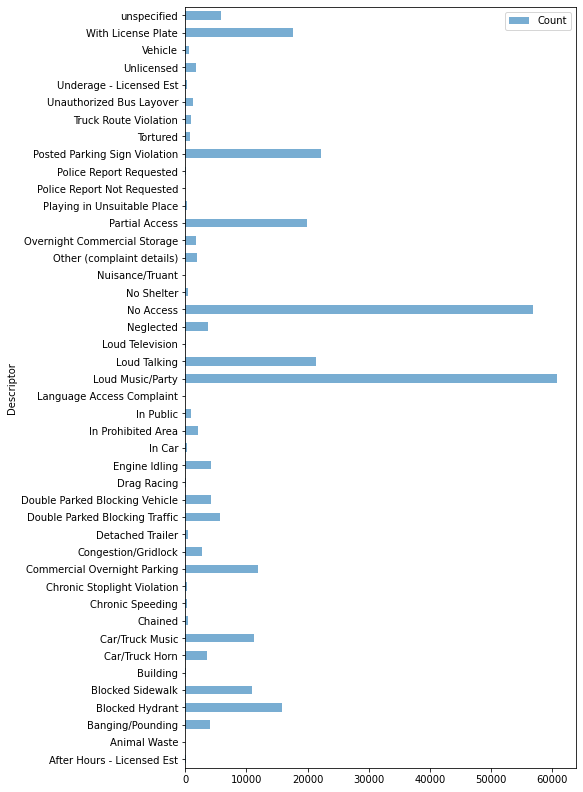

In [168]:
# Top complaints in dataset
groupedByDescriptor = pd.DataFrame({"Count": nyc_df.groupby("Descriptor").size()})
groupedByDescriptor.sort_values("Count", ascending=False)
dax = groupedByDescriptor.plot(kind="barh", alpha=0.6, figsize=(7, 14))
dax.set_xlabel = "Count"
dax.set_ylabel = "Descriptor"
plt.show()

Based on the above observations, "Loud Music/Party" is the highest reported descriptor.

### Top complaints by Borough

In [169]:
# Top 5 complaints in each borough and their counts
topComplaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
topComplaintsByBorough = nyc_df.groupby(['Borough','Complaint Type']).size().unstack()
topComplaintsByBorough = topComplaintsByBorough[topComplaints]
topComplaintsByBorough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12751.0,7857.0,2433.0,8889.0,1952.0,1415.0
BROOKLYN,28139.0,27454.0,11458.0,13353.0,5179.0,2393.0
MANHATTAN,2071.0,12127.0,14554.0,20541.0,537.0,1525.0
QUEENS,31633.0,21974.0,6071.0,4401.0,8106.0,1875.0
STATEN ISLAND,2142.0,4885.0,678.0,817.0,1765.0,557.0
Unspecified,57.0,218.0,51.0,67.0,46.0,1.0


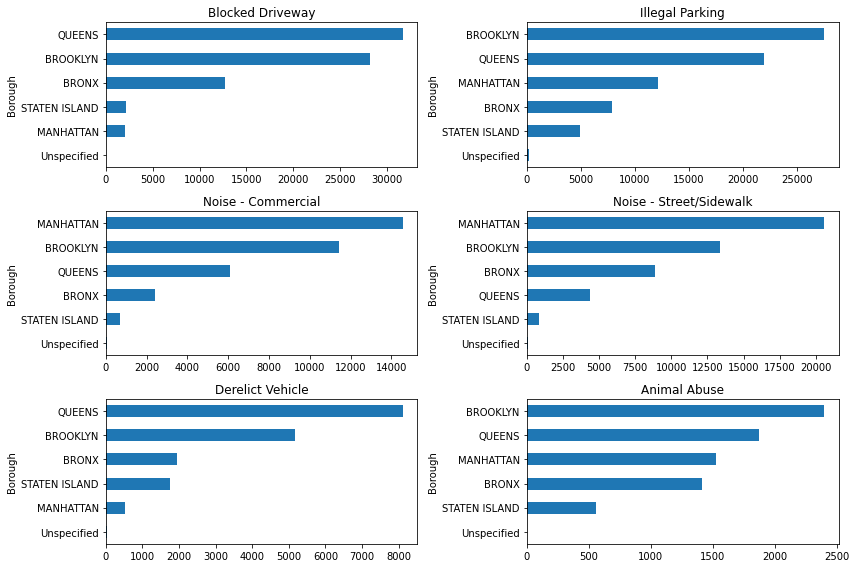

In [170]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(topComplaintsByBorough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

* Clearly Manhattan is making most of the noise, followed by Brooklyn.
* Brooklyn has the most number of 'Illegal parking' complaints and is also on the top for 'Animal Abuse'. (Savages!)
* Queens has highest complaints for 'Blocked Driveway' as well as for 'Derelict Vehicle'.

### Complaints vs Borough plot

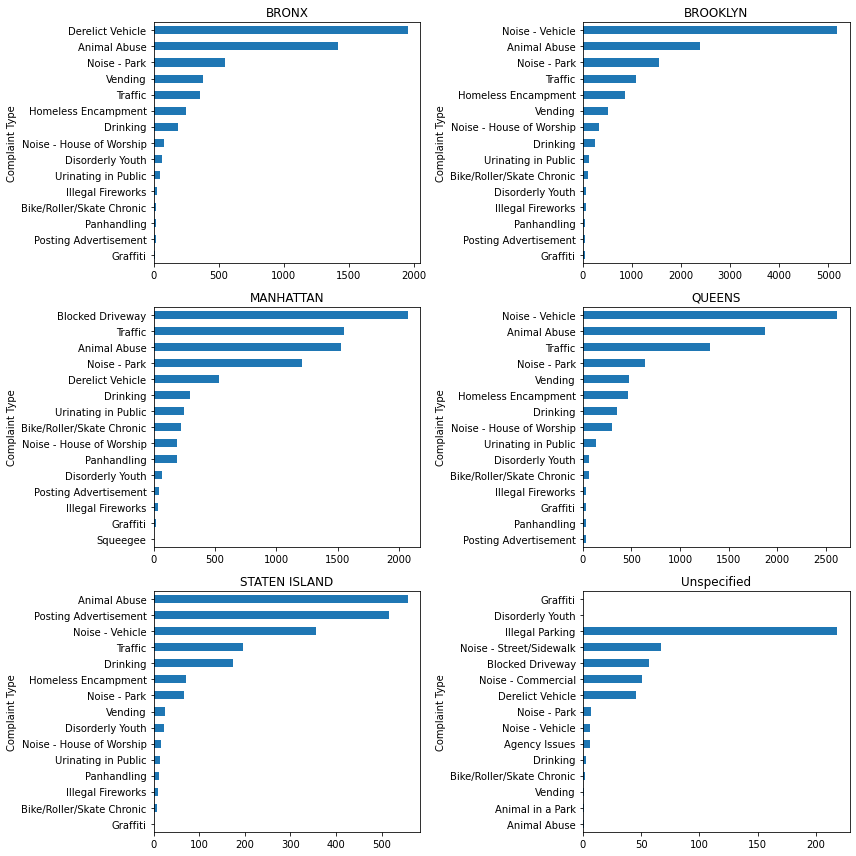

In [171]:
complaintsByBorough = nyc_df.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(complaintsByBorough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

* Apart from Manhattan, number of Complaints for 'Blocked Driveway' and 'Illegal Parking' is highest for each Borough.
* Manhattan has highest number of Noise complaints. Fortunaltely, parking in Manhattan is better than other Boroughs.

### Plots based on Complaint Elapsed time

In [172]:
# Convert elapsed time to hours (ceil rounding so, adding '1')
nyc_df['Request_Closing_Hours'] = nyc_df['Request_Closing_Time'].astype('timedelta64[h]') + 1
nyc_df[['Request_Closing_Time', 'Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [173]:
etMean = nyc_df['Request_Closing_Hours'].mean()
etStandardDeviation = nyc_df['Request_Closing_Hours'].std()
print("Average elapsed time is {:.1f} hour(s) and Standard Deviation is {:.1f} hour(s)".format(etMean, etStandardDeviation))

Average elapsed time is 4.8 hour(s) and Standard Deviation is 6.1 hour(s)


In [174]:
nyc_df['Request_Closing_Hours'].sort_values().tail()

12168     224.0
283132    337.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

* As we can see, some of the closing times are too high and hence will be dealt as outliers.
* We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
* z-statistic = (value-mean)/std

#### Next we will plot the histogram of our Request_Closing_Time.

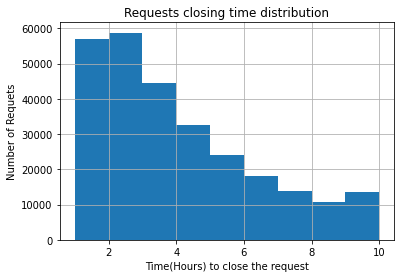

In [175]:
plot_data = nyc_df[ ((nyc_df['Request_Closing_Hours'] - etMean)/etStandardDeviation) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

* Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.
* Around 99% of the complaints were closed within 10 hours.
* Lets look at the closing complaint performance Boroughwise

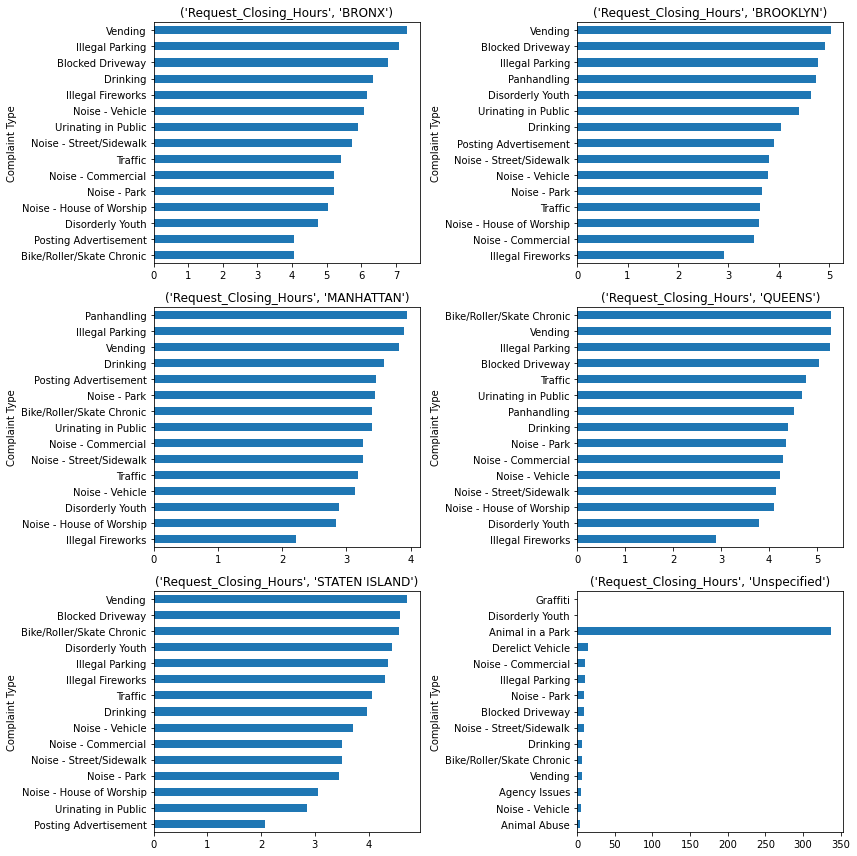

In [176]:
elapsedTimeByCity = nyc_df.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

c = 2
r = 3
fig, axes = plt.subplots(r, c , figsize=(12,12))

for i, (label,col) in enumerate(elapsedTimeByCity.iteritems()):
    ax = axes[int(i/c), i % c]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

* Clealry 'Graffiti' complaints are taking a long time to be closed. Could be because the number of Graffiti complaints are very less and officials are focused on more pressing issues.
* Manhattan, Bronx and Queens are handling 'Disorderly Youth' complaints very well.
* Brooklyn is performing well to close Noise and traffic complaints.

#### Lets now do a month wise analysis of complaints.

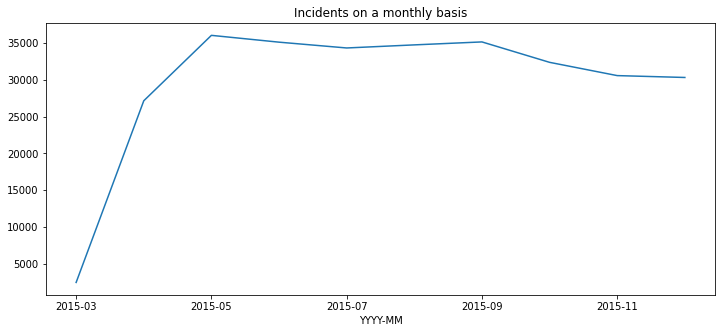

In [178]:
import datetime
nyc_df['YYYY-MM'] = nyc_df['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  nyc_df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

* January and Februray have the least number of complaints (Holidays or Winter ?)
* May and September has the highest number of complaints (Summer parties ?)

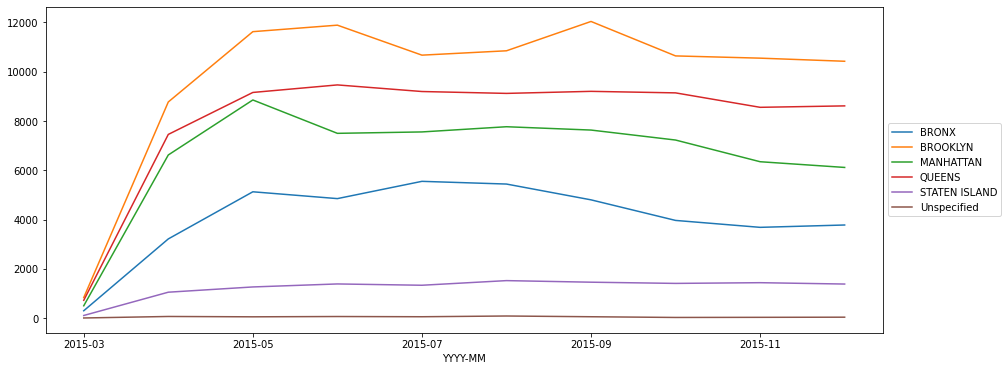

In [181]:
# Complaints per Borough through the year
nyc_df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

* Brooklyn raise highest number of complaints in May and September and least comlaints in February.

#### As for the Request Closing time

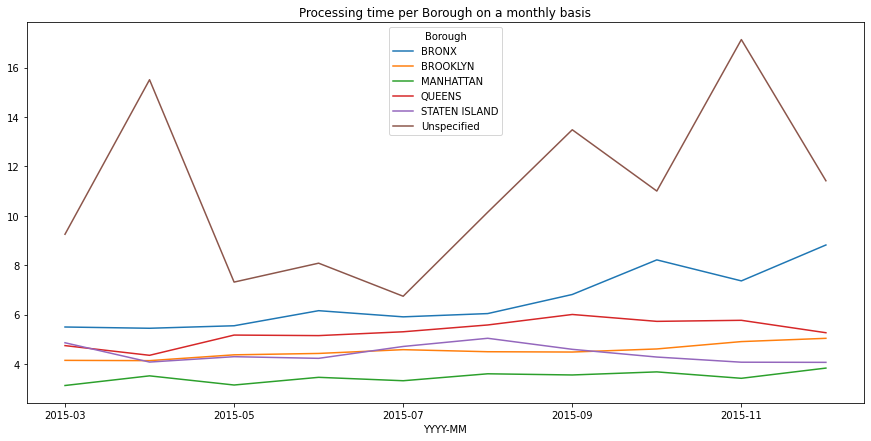

In [182]:
nyc_df.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,7), title='Processing time per Borough on a monthly basis');

* Manhattan has the best average closing time throughout the year.
* Shockingly Bronx has the highest closing time. It also has the leasts number of complaints after Staten island.
* Staten island's closing time is better than Bronx.

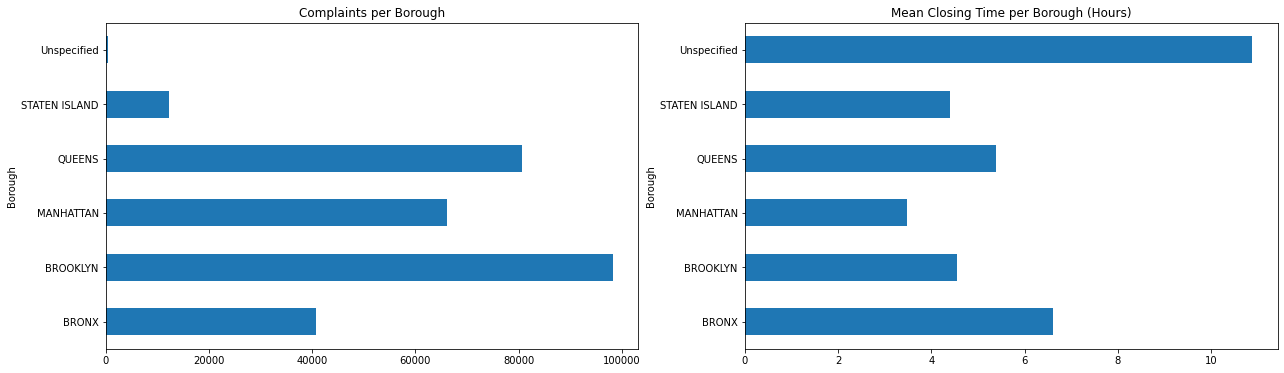

In [183]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
nyc_df.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
nyc_df.groupby('Borough')['Request_Closing_Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

### Conclusion:
* Most complaints raised in May and September, while least in February.
* Highest number of complaints raised are of 'Blocked Driveway' (28% of all the complaints)
* Second highest number of complaints are of Noice Complaints (26% of all the complaints including both streetwalk and commercial complaints)
* Third highest number of complaints are of 'Illegal Parking' (25% of all the complaints)

## Hypothesis Testing
### a) Whether the average response time across complaint types is similar or not (overall)
* First we will convert our hourly timedelta into minuted for more precise results.
* Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.
* We see a positive skewness in data if we limit the range to 1250

#### As our data contains too many outliers , hence we will transform the data using log transformation

<AxesSubplot:>

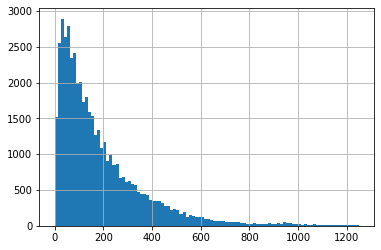

In [193]:
# Checking average response time for Noise - Street/Sidewalk
nyc_df['Request_Closing_Minutes'] = nyc_df['Request_Closing_Time'].astype('timedelta64[m]') + 1

noise_df = nyc_df[nyc_df['Complaint Type'] == 'Noise - Street/Sidewalk']['Request_Closing_Minutes']
noise_df.hist(bins=100,range=(0,1250))

In [194]:
noise_df.describe()

count    48068.000000
mean       207.425917
std        326.875692
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

* When we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.
* We will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.

#### Log transformation removes the skewness from the data:

<AxesSubplot:>

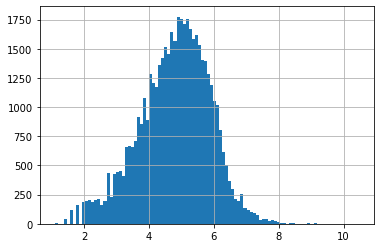

In [196]:
complaints = {}
for complaint in nyc_df['Complaint Type'].unique():
    complaints[complaint] = np.log(nyc_df[nyc_df['Complaint Type'] == complaint]['Request_Closing_Minutes'])

complaints['Noise - Street/Sidewalk'].hist(bins=100)

Above distribution plot shows that once we apply log Transformation to our data, skewness is almost removed and it looks more like a normal distribution.

<AxesSubplot:>

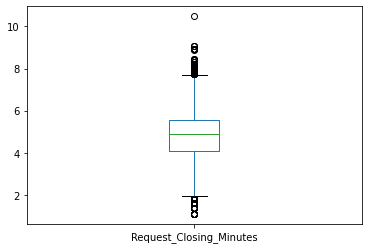

In [192]:
data['Noise - Street/Sidewalk'].plot(kind = 'box')

In [201]:
for complaint in complaints.keys():
    print(complaint, complaints[complaint].std(), sep = ": ")

Noise - Street/Sidewalk: 1.0888636112648278
Blocked Driveway: 0.9690231876804977
Illegal Parking: 1.067631138399571
Derelict Vehicle: 1.247381114678433
Noise - Commercial: 1.0752180263378996
Noise - House of Worship: 1.1578783566404027
Posting Advertisement: 1.1947703475310802
Noise - Vehicle: 1.0641155960985347
Animal Abuse: 1.0354300187739158
Vending: 1.098835516648212
Traffic: 1.1693528682279035
Drinking: 1.0354238334658072
Bike/Roller/Skate Chronic: 1.1547492289003025
Panhandling: 1.0578811759503506
Noise - Park: 1.1037144703366808
Homeless Encampment: 1.0201415460761345
Urinating in Public: 1.0896898895618483
Graffiti: 1.0581967861803852
Disorderly Youth: 1.027674837024446
Illegal Fireworks: 1.1905406895067956
Agency Issues: 0.8285353314860184
Squeegee: 0.8469384425802964
Animal in a Park: nan


To conduct our hypothesis test, we will conduct an *ANOVA (analysis of variance) test* as we have to compare the means of more than two groups.
##### Below conditions should be met before conducting ANOVA:
* All distributions must follow a normal distributions curve. We have verified this after the log transformation
* Standard deviation for all groups must be same. Above output proves that this is true.
* All samples are drawn independently of each other.

### Defining Null and Alternate Hypothesis:
H(o): Average response time for all the complaints type is same.
H(a): Average response time for all the complaints type is not same and theres is some difference among the groups.

#### Below We conduct ANOVA test for top 5 type of complaints
* For a 95% of confidence interval we choose our alpha as 0.05 for 5%
* Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

**if p < alpha(0.05):** Reject Null Hypothesis, Average response time for all the complaints type is not same.

**if p > alpha(0.05):** Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [205]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway as fow

stat, p = fow(complaints['Noise - Street/Sidewalk'],
              complaints['Blocked Driveway'],
              complaints['Illegal Parking'],
              complaints['Derelict Vehicle'],
              complaints['Noise - Commercial'])
print('Statistics = %.3f, p = %.3f' % (stat, p))

# interpret hypothesis
alpha = 0.05
if p > alpha:
    print('Verdict = Fail to reject H(o) since they have same distributions')
else:
    print('Verdict = Reject H(o) since they have different distributions')

Statistics = 2465.264, p = 0.000
Verdict = Reject H(o) since they have different distributions


Since our **_p-value is very low_** (and floored to 0.0), we will conclude by saying **_Average response time for all the complaints are not the same_**

### b) Are the type of complaint or service requested and location related?
##### To find the correlation between location and complaint types, we will consider below columns
- Complaint Type
- Borough
- City
- Longitude
- Latitude

In [256]:
corr_df = nyc_df[['Complaint Type','Borough','Longitude','Latitude','City']]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298471 entries, 0 to 300697
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Complaint Type  298471 non-null  object
 1   Borough         298471 non-null  object
 2   Longitude       298471 non-null  object
 3   Latitude        298471 non-null  object
 4   City            298471 non-null  object
dtypes: object(5)
memory usage: 21.7+ MB


Let us convert the variables to numerical values as corr() cannot be applied on Object types

In [257]:
corr_df[corr_df['Latitude'] == 'unspecified']

,Complaint Type,Borough,Longitude,Latitude,City
33,Illegal Parking,Unspecified,unspecified,unspecified,unspecified
283,Illegal Parking,Unspecified,unspecified,unspecified,unspecified
302,Blocked Driveway,Unspecified,unspecified,unspecified,unspecified
434,Illegal Parking,QUEENS,unspecified,unspecified,WOODSIDE
1328,Traffic,MANHATTAN,unspecified,unspecified,NEW YORK
...,...,...,...,...,...
299590,Vending,MANHATTAN,unspecified,unspecified,NEW YORK
299765,Blocked Driveway,Unspecified,unspecified,unspecified,unspecified
299803,Noise - Vehicle,BROOKLYN,unspecified,unspecified,BROOKLYN
299817,Noise - Street/Sidewalk,BROOKLYN,unspecified,unspecified,BROOKLYN


In [261]:
pd.options.mode.chained_assignment = None

corr_df.loc[corr_df['Latitude'] == 'unspecified', "Latitude"] = 0
corr_df.loc[corr_df['Longitude'] == 'unspecified', "Longitude"] = 0

corr_df['Latitude'] = corr_df.loc[:, 'Latitude'].astype('float64')
corr_df['Longitude'] = corr_df.loc[:, 'Longitude'].astype('float64')

#### Note: 
We can ignore the above warning as pandas is trying to warn us about chained indexing

In [262]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

for col in corr_df.columns:
    labelEncoder.fit(corr_df[col])
    corr_df[col] = labelEncoder.transform(corr_df[col])
corr_df.head(10)

,Complaint Type,Borough,Longitude,Latitude,City
0,15,2,62819,119361,33
1,4,3,68395,96832,1
2,4,0,83759,120532,6
3,11,0,107786,110879,6
4,11,3,89459,75384,13
5,11,1,18146,32629,7
6,11,2,54468,112283,33
7,4,0,76346,111356,6
8,11,3,106479,60050,26
9,4,1,14327,16701,7


In [263]:
corr_df.corr(method="pearson")

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.065543,-0.214888,0.155105,0.094930
Borough,-0.065543,1.000000,0.117103,-0.158435,0.720248
Longitude,-0.214888,0.117103,1.000000,0.327633,-0.047984
Latitude,0.155105,-0.158435,0.327633,1.000000,0.049472
City,0.094930,0.720248,-0.047984,0.049472,1.000000


* As we can see from above table, there is no relationship between complaint type and location.
* Which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.